In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

ModuleNotFoundError: No module named 'pandas'

In [ ]:
N = int(input("Digite o número de clientes/terminais (N): "))
K = int(input("Digite o número de recursos disponíveis (K): "))

In [3]:
S_recursos = []
V_recursos = []
nomes_recursos = [f"Recurso {i+1}" for i in range(K)]

In [4]:
for i in range(K):
    print(f"Recurso {i + 1}")
    
    # Pedir o Tempo de Serviço (S_i)
    while True:
        try:
            s_i = float(input(f"Digite o Tempo de Serviço (S_{i+1}): "))
            if s_i <= 0:
                print("Erro: O tempo de serviço deve ser um valor positivo.")
            else:
                S_recursos.append(s_i)
                break
        except ValueError:
            print("Erro: Entrada inválida. Digite um número (ex: 0.3).")

    # Pedir o Número de Visitas (V_i)
    while True:
        try:
            v_i = int(input(f"Digite o Número de Visitas (V_{i+1}): "))
            if v_i < 0:
                 print("Erro: O número de visitas não pode ser negativo.")
            else:
                V_recursos.append(v_i)
                break
        except ValueError:
            print("Erro: Entrada inválida. Digite um número inteiro (ex: 10).")

Recurso 1
Recurso 2
Recurso 3


In [5]:
while True:
    try:
        Z = float(input("Digite o Tempo de Pensar (Z): "))
        if Z < 0:
            print("Erro: O tempo de pensar não pode ser negativo.")
        else:
            break
    except ValueError:
        print("Erro: Entrada inválida. Digite um número (ex: 4).")

In [7]:
print("\n--- Dados Coletados ---")
print(f"N (Clientes): {N}")
print(f"K (Recursos): {K}")
print(f"Z (Tempo de Pensar): {Z}")
print(f"S (Tempos de Serviço): {S_recursos}")
print(f"V (Visitas): {V_recursos}")


--- Dados Coletados ---
N (Clientes): 20
K (Recursos): 3
Z (Tempo de Pensar): 4.0
S (Tempos de Serviço): [0.3, 0.2, 0.125]
V (Visitas): [10, 5, 16]


# Análise de MVA para filas fechadas

```Inicialização:
for i = 1 to K do 
    N_i = 0 
for n = 1 to N do 
    begin 
        for i = 1 to k do 
            R_i = S_i * (1 + N_i)

        R = sum from i=1 to k: R_i * V_i

        X_0 = n / (R+Z)

        for i = 1 tp k do
            N_i = X_0 * V_i * R_i

```

In [8]:
hist_n = []
hist_X0 = []
hist_R = []
hist_N_filas = []

N_recursos = list(0 for _ in range(K))

In [9]:
print(f"{'Iteração (n)':<12} | {'X_0 (Throughput)':<16} | {'R (Resp. Sistema)':<18} | {'N (Fila Recursos)':<20}")
print("-" * 80)

for n in range(1, N+1):

    R_recursos = list(0 for _ in range(K))
    for i in range(K):
        R_recursos[i] = S_recursos[i] * (1 + N_recursos[i])

    R = 0
    for i in range(K):
        R = R + R_recursos[i] * V_recursos[i]

    X_0 = n / (R + Z)

    for i in range(K):
        N_recursos[i] = X_0 * R_recursos[i] * V_recursos[i]

    hist_n.append(n)
    hist_X0.append(X_0)
    hist_R.append(R)
    hist_N_filas.append(list(N_recursos))

    n_formatado = [round(val, 3) for val in N_recursos]
    print(f"{n:<12} | {X_0:<16.4f} | {R:<18.4f} | {str(n_formatado)}")


Iteração (n) | X_0 (Throughput) | R (Resp. Sistema)  | N (Fila Recursos)   
--------------------------------------------------------------------------------
1            | 0.1000           | 6.0000             | [0.3, 0.1, 0.2]
2            | 0.1754           | 7.4000             | [0.684, 0.193, 0.421]
3            | 0.2292           | 9.0877             | [1.158, 0.273, 0.651]
4            | 0.2658           | 11.0509            | [1.721, 0.338, 0.878]
5            | 0.2898           | 13.2561            | [2.365, 0.388, 1.088]
6            | 0.3052           | 15.6592            | [3.081, 0.424, 1.275]
7            | 0.3151           | 18.2158            | [3.858, 0.449, 1.433]
8            | 0.3214           | 20.8884            | [4.684, 0.466, 1.564]
9            | 0.3255           | 23.6472            | [5.551, 0.477, 1.67]
10           | 0.3282           | 26.4699            | [6.45, 0.485, 1.752]
11           | 0.3299           | 29.3399            | [7.374, 0.49, 1.816]
12   

In [10]:
df_sistema = pd.DataFrame({
    'n (Clientes)': hist_n,
    'Throughput (X_0)': hist_X0,
    'Tempo de Resposta (R)': hist_R
})

In [ ]:
df_filas_wide = pd.DataFrame(hist_N_filas, columns=nomes_recursos)
df_filas_wide['n (Clientes)'] = hist_n

df_filas_long = df_filas_wide.melt('n (Clientes)', 
                                 var_name='Recurso', 
                                 value_name='Tamanho da Fila (N_i)')

# adicionar salvar a tabela principal em um csv
df_tabela_completa = pd.merge(df_sistema, df_filas_wide, on='n (Clientes)')

nome_arquivo = 'resultados_simulacao.csv'
df_tabela_completa.to_csv(nome_arquivo, index=False)

print(f"\nResultados salvos com sucesso em '{nome_arquivo}'!")

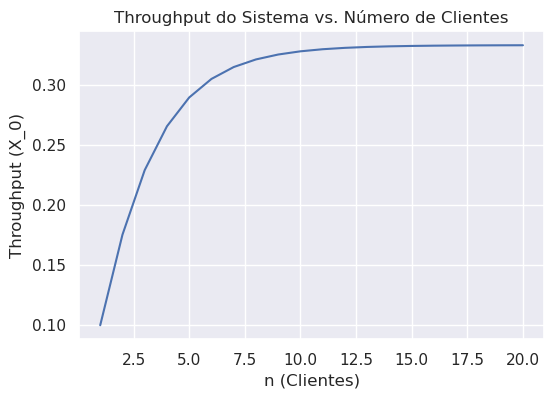

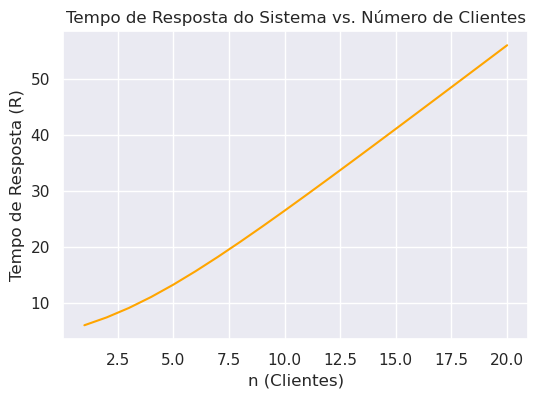

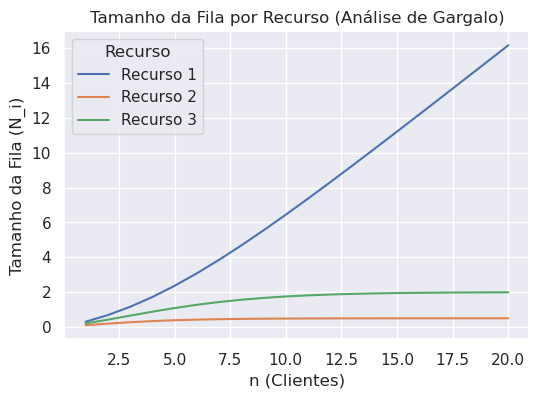

In [ ]:
sns.set_theme(style="darkgrid")

# Gráfico 1: Throughput (X_0) vs. n
plt.figure(figsize=(6, 4))
sns.lineplot(data=df_sistema, x='n (Clientes)', y='Throughput (X_0)', markers='o')
plt.title('Throughput do Sistema vs. Número de Clientes')
plt.show()

# Gráfico 2: Tempo de Resposta (R) vs. n
plt.figure(figsize=(6, 4))
sns.lineplot(data=df_sistema, x='n (Clientes)', y='Tempo de Resposta (R)', color='orange', markers='o')
plt.title('Tempo de Resposta do Sistema vs. Número de Clientes')
plt.show()

# Gráfico 3: Tamanho da Fila (N_i) vs. n (Análise de Gargalo)
plt.figure(figsize=(6, 4))
sns.lineplot(data=df_filas_long, x='n (Clientes)', y='Tamanho da Fila (N_i)', hue='Recurso', markers='o')
plt.title('Tamanho da Fila por Recurso (Análise de Gargalo)')
plt.legend(title='Recurso')
plt.show()


---

# Algoritmo MVA Aproximado

```
for i = 1 to K do
    N_i = N/K
while max_i{|N_i - X_0*R_i*V_i|} > epslon do
    for i = 1 to k do 
        R_i = S_i * (1 + N_i)

    R = sum from i=1 to k: R_i * V_i

    X_0 = n / (R+Z)

    for i = 1 tp k do
        N_i = X_0 * V_i * R_i
        
```

In [ ]:
hist_n = []
hist_X0 = []
hist_R = []
hist_N_filas = []


N_recursos = list(N/K for _ in range(K))

epslon = 0.01
# epslon = 0.001

X0 = N / sum(V_recursos)

In [ ]:
while True:
    max_diff = max(abs(N_recursos[i] - N/K) for i in range(K))
    if max_diff < epslon:
        break

    R_recursos = list(0 for _ in range(K))
    for i in range(K):
        R_recursos[i] = S_recursos[i] * (1 + N_recursos[i])

    R = 0
    for i in range(K):
        R = R + R_recursos[i] * V_recursos[i]

    X_0 = n / (R + Z)

    for i in range(K):
        N_recursos[i] = X_0 * R_recursos[i] * V_recursos[i]

    hist_n.append(n)
    hist_X0.append(X_0)
    hist_R.append(R)
    hist_N_filas.append(list(N_recursos))

    n_formatado = [round(val, 3) for val in N_recursos]
    print(f"{n:<12} | {X_0:<16.4f} | {R:<18.4f} | {str(n_formatado)}")    

print("Resultado final após convergência:")
for i in range(K):
    print(f"Recurso {i+1}: N = {N_recursos[i]}, X0 = {X0}, R = {R[i]}")

In [ ]:
df_sistema = pd.DataFrame({
    'n (Clientes)': hist_n,
    'Throughput (X_0)': hist_X0,
    'Tempo de Resposta (R)': hist_R
})

In [ ]:
df_filas_wide = pd.DataFrame(hist_N_filas, columns=nomes_recursos)
df_filas_wide['n (Clientes)'] = hist_n

df_filas_long = df_filas_wide.melt('n (Clientes)', 
                                 var_name='Recurso', 
                                 value_name='Tamanho da Fila (N_i)')

# adicionar salvar a tabela principal em um csv
df_tabela_completa = pd.merge(df_sistema, df_filas_wide, on='n (Clientes)')

nome_arquivo = 'resultados_simulacao.csv'
df_tabela_completa.to_csv(nome_arquivo, index=False)

print(f"\nResultados salvos com sucesso em '{nome_arquivo}'!")

In [ ]:
sns.set_theme(style="darkgrid")

# Gráfico 1: Throughput (X_0) vs. n
plt.figure(figsize=(6, 4))
sns.lineplot(data=df_sistema, x='n (Clientes)', y='Throughput (X_0)', markers='o')
plt.title('Throughput do Sistema vs. Número de Clientes')
plt.show()

# Gráfico 2: Tempo de Resposta (R) vs. n
plt.figure(figsize=(6, 4))
sns.lineplot(data=df_sistema, x='n (Clientes)', y='Tempo de Resposta (R)', color='orange', markers='o')
plt.title('Tempo de Resposta do Sistema vs. Número de Clientes')
plt.show()

# Gráfico 3: Tamanho da Fila (N_i) vs. n (Análise de Gargalo)
plt.figure(figsize=(6, 4))
sns.lineplot(data=df_filas_long, x='n (Clientes)', y='Tamanho da Fila (N_i)', hue='Recurso', markers='o')
plt.title('Tamanho da Fila por Recurso (Análise de Gargalo)')
plt.legend(title='Recurso')
plt.show()

# gerar gráficos de throughput e tempo de resposta

